## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Exploratory Data Analysis (EDA)

In [2]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


Histograms for Numerical Features:


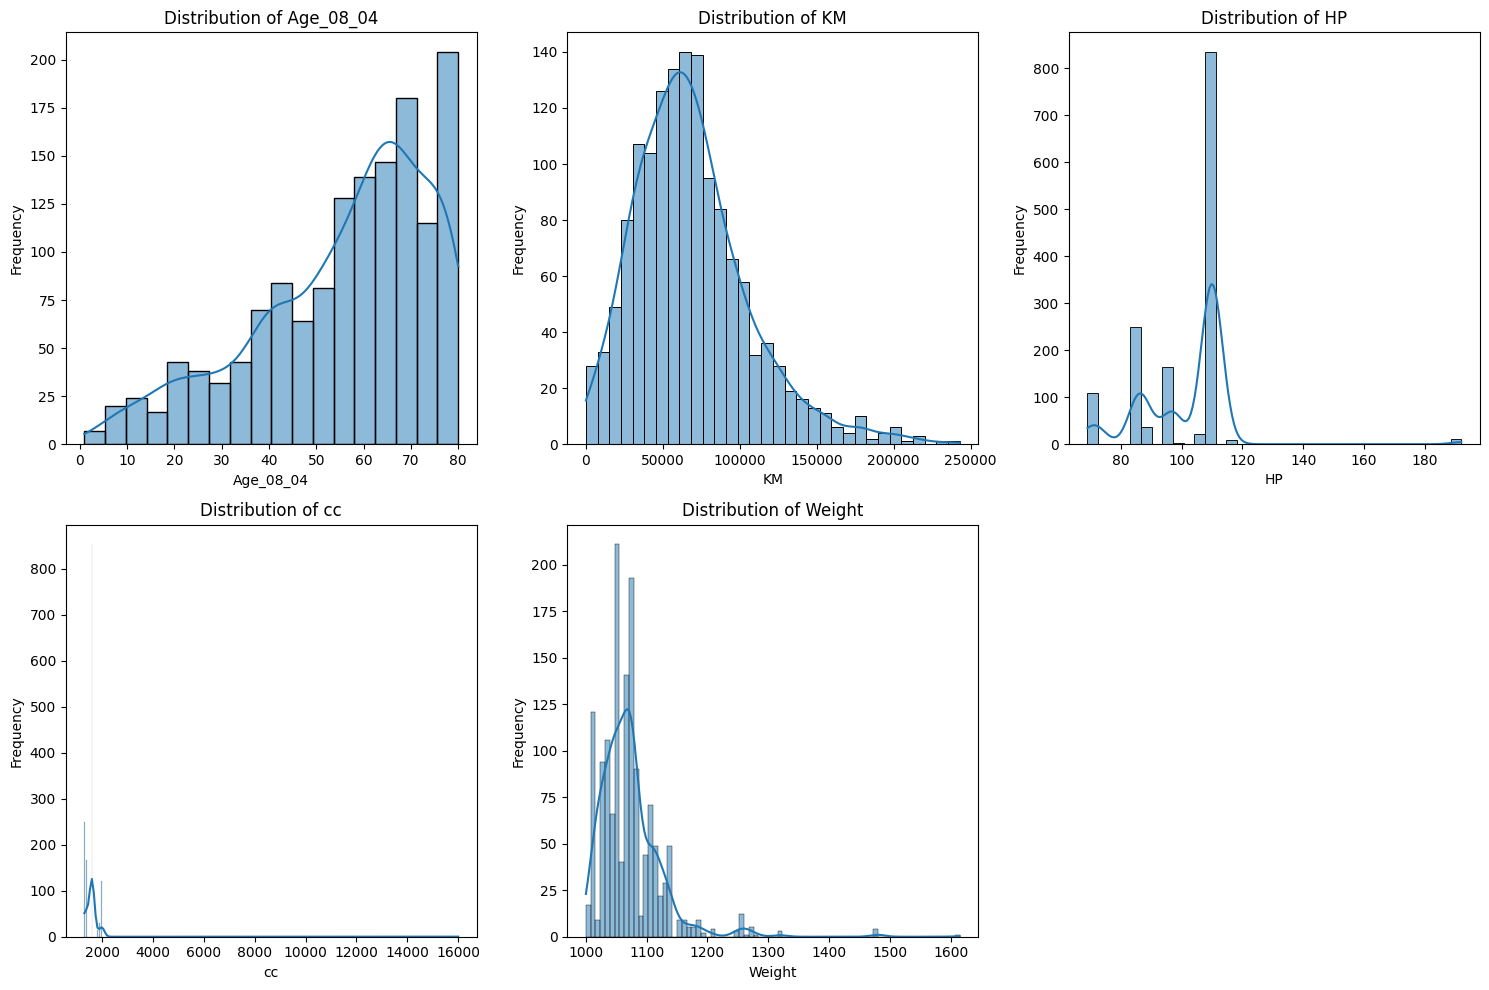

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns for histograms (excluding 'Price' as it's the target, and features that are categorical in nature, like 'Automatic', 'Doors', 'Cylinders', 'Gears')
numerical_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']

print("Histograms for Numerical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Box Plots for Numerical Features:


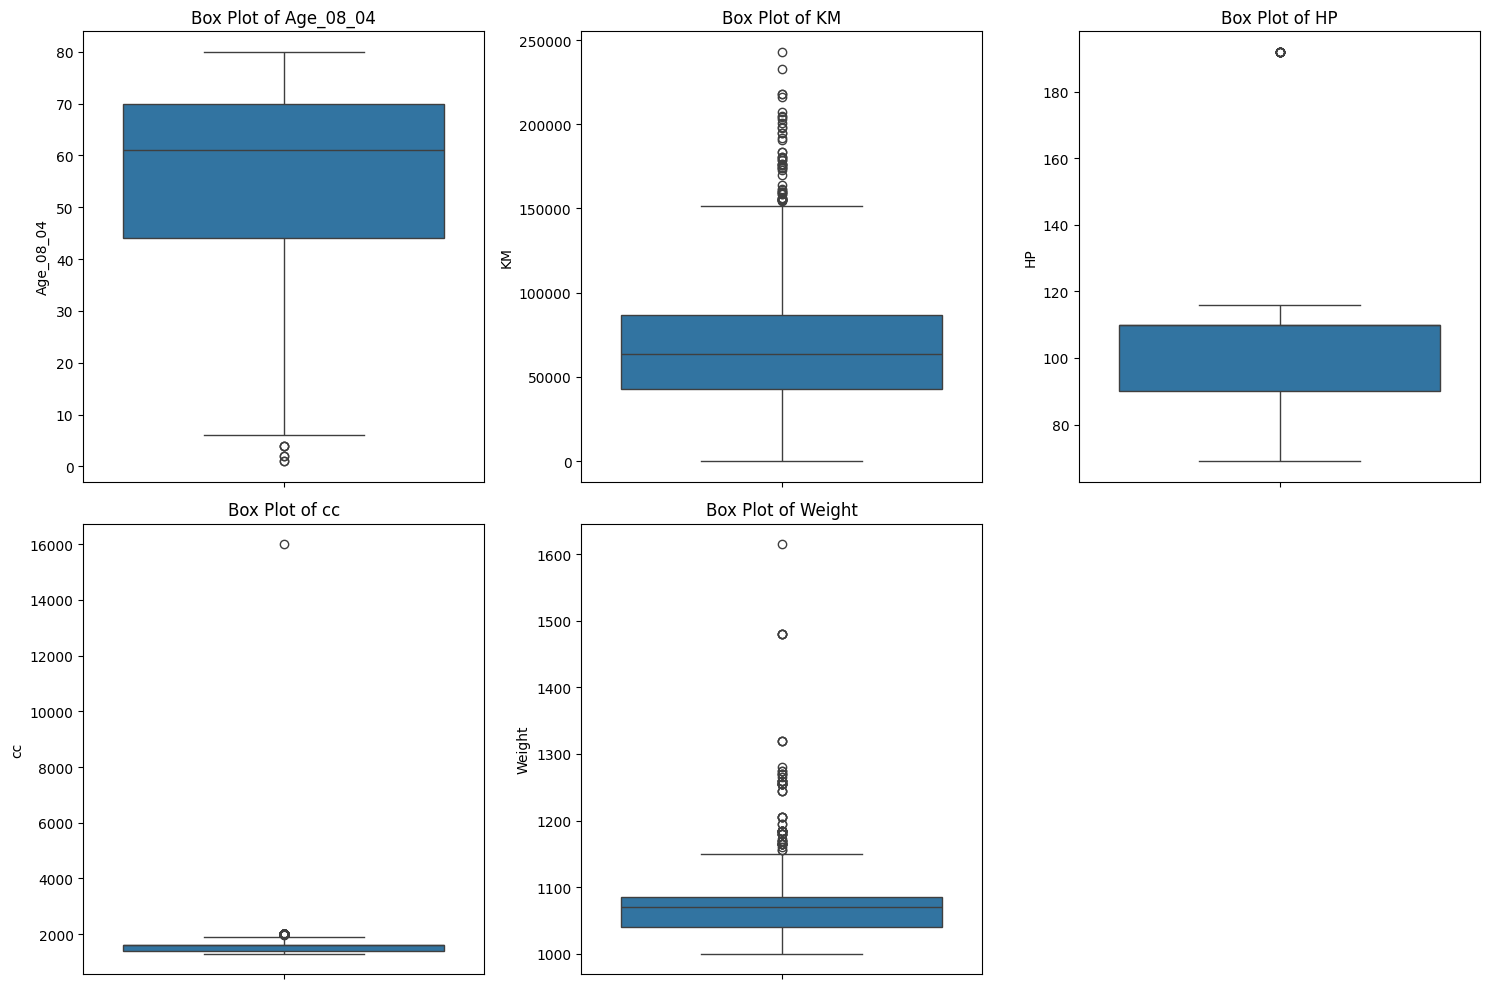

In [6]:
print("Box Plots for Numerical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Scatter Plots for Numerical Features vs. Price:


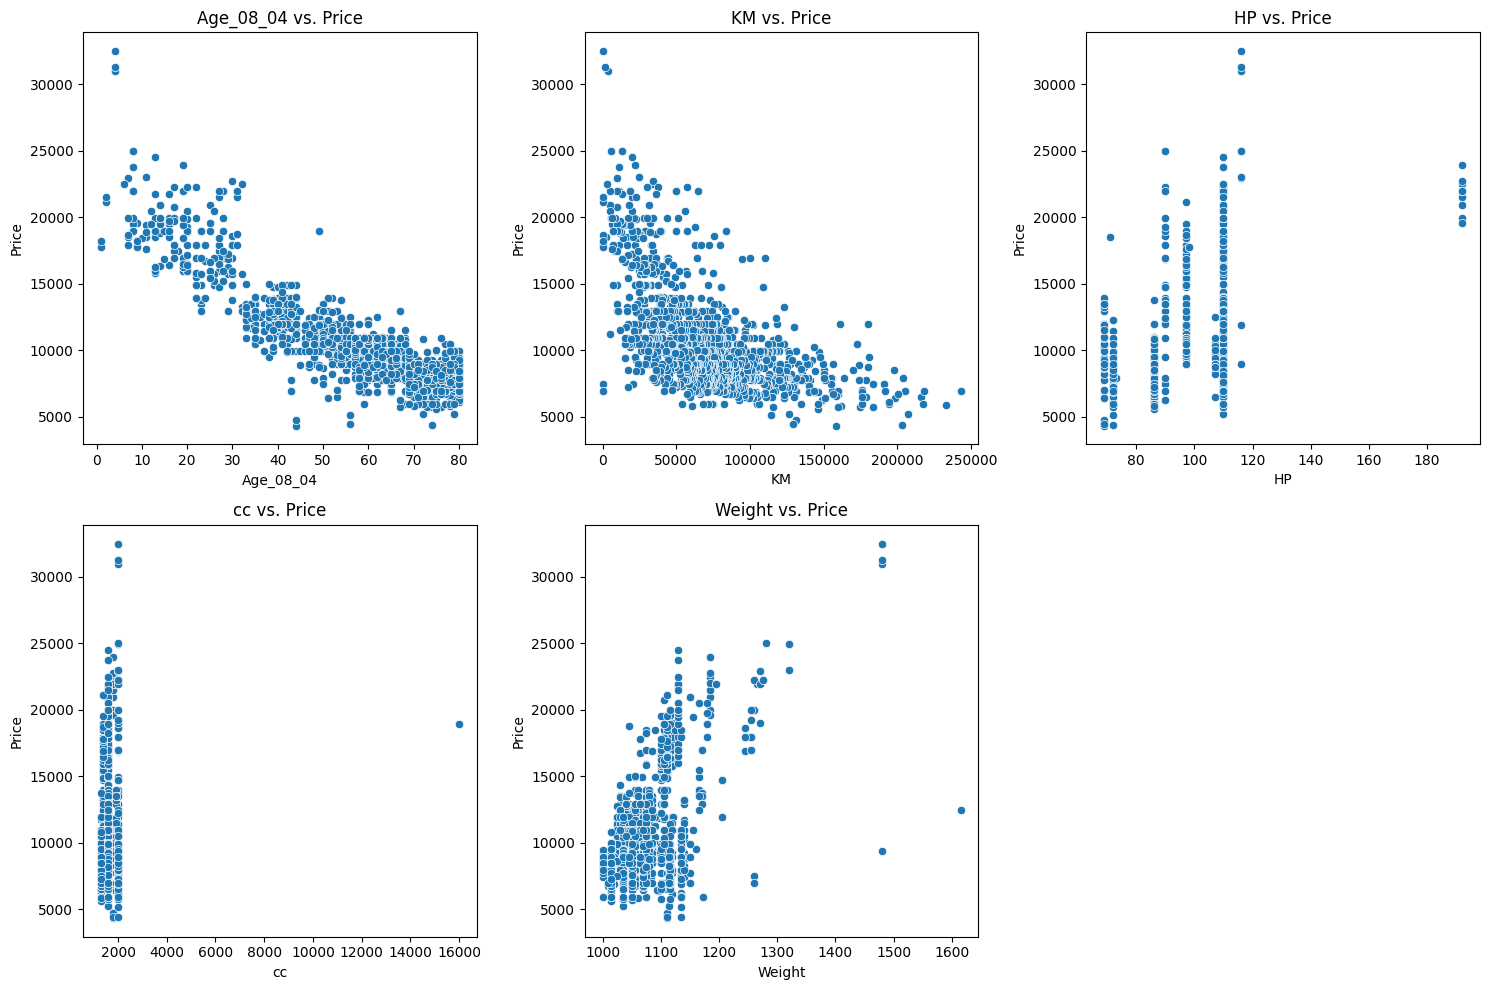

In [7]:
print("Scatter Plots for Numerical Features vs. Price:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Correlation Matrix:


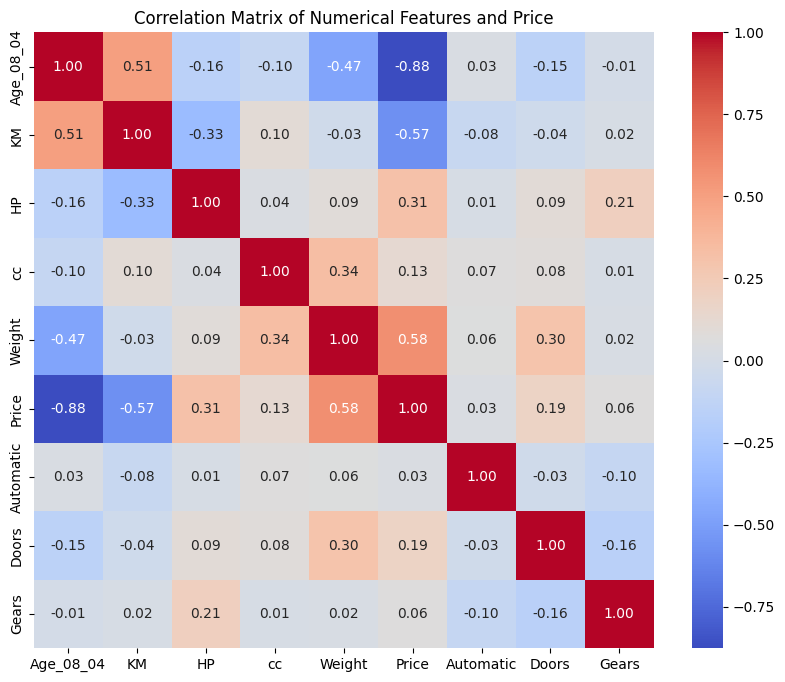

In [8]:
print("Correlation Matrix:")
correlation_matrix = df[numerical_cols + ['Price', 'Automatic', 'Doors', 'Gears']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

In [9]:
print("Unique Values and Value Counts for Categorical Features:")
categorical_cols = ['Fuel_Type', 'Automatic', 'Doors', 'Cylinders', 'Gears']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts())


Unique Values and Value Counts for Categorical Features:

--- Fuel_Type ---
Unique values: ['Diesel' 'Petrol' 'CNG']
Value counts:
 Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

--- Automatic ---
Unique values: [0 1]
Value counts:
 Automatic
0    1356
1      80
Name: count, dtype: int64

--- Doors ---
Unique values: [3 5 4 2]
Value counts:
 Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

--- Cylinders ---
Unique values: [4]
Value counts:
 Cylinders
4    1436
Name: count, dtype: int64

--- Gears ---
Unique values: [5 6 3 4]
Value counts:
 Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64


Box Plots for Categorical Features vs. Price:


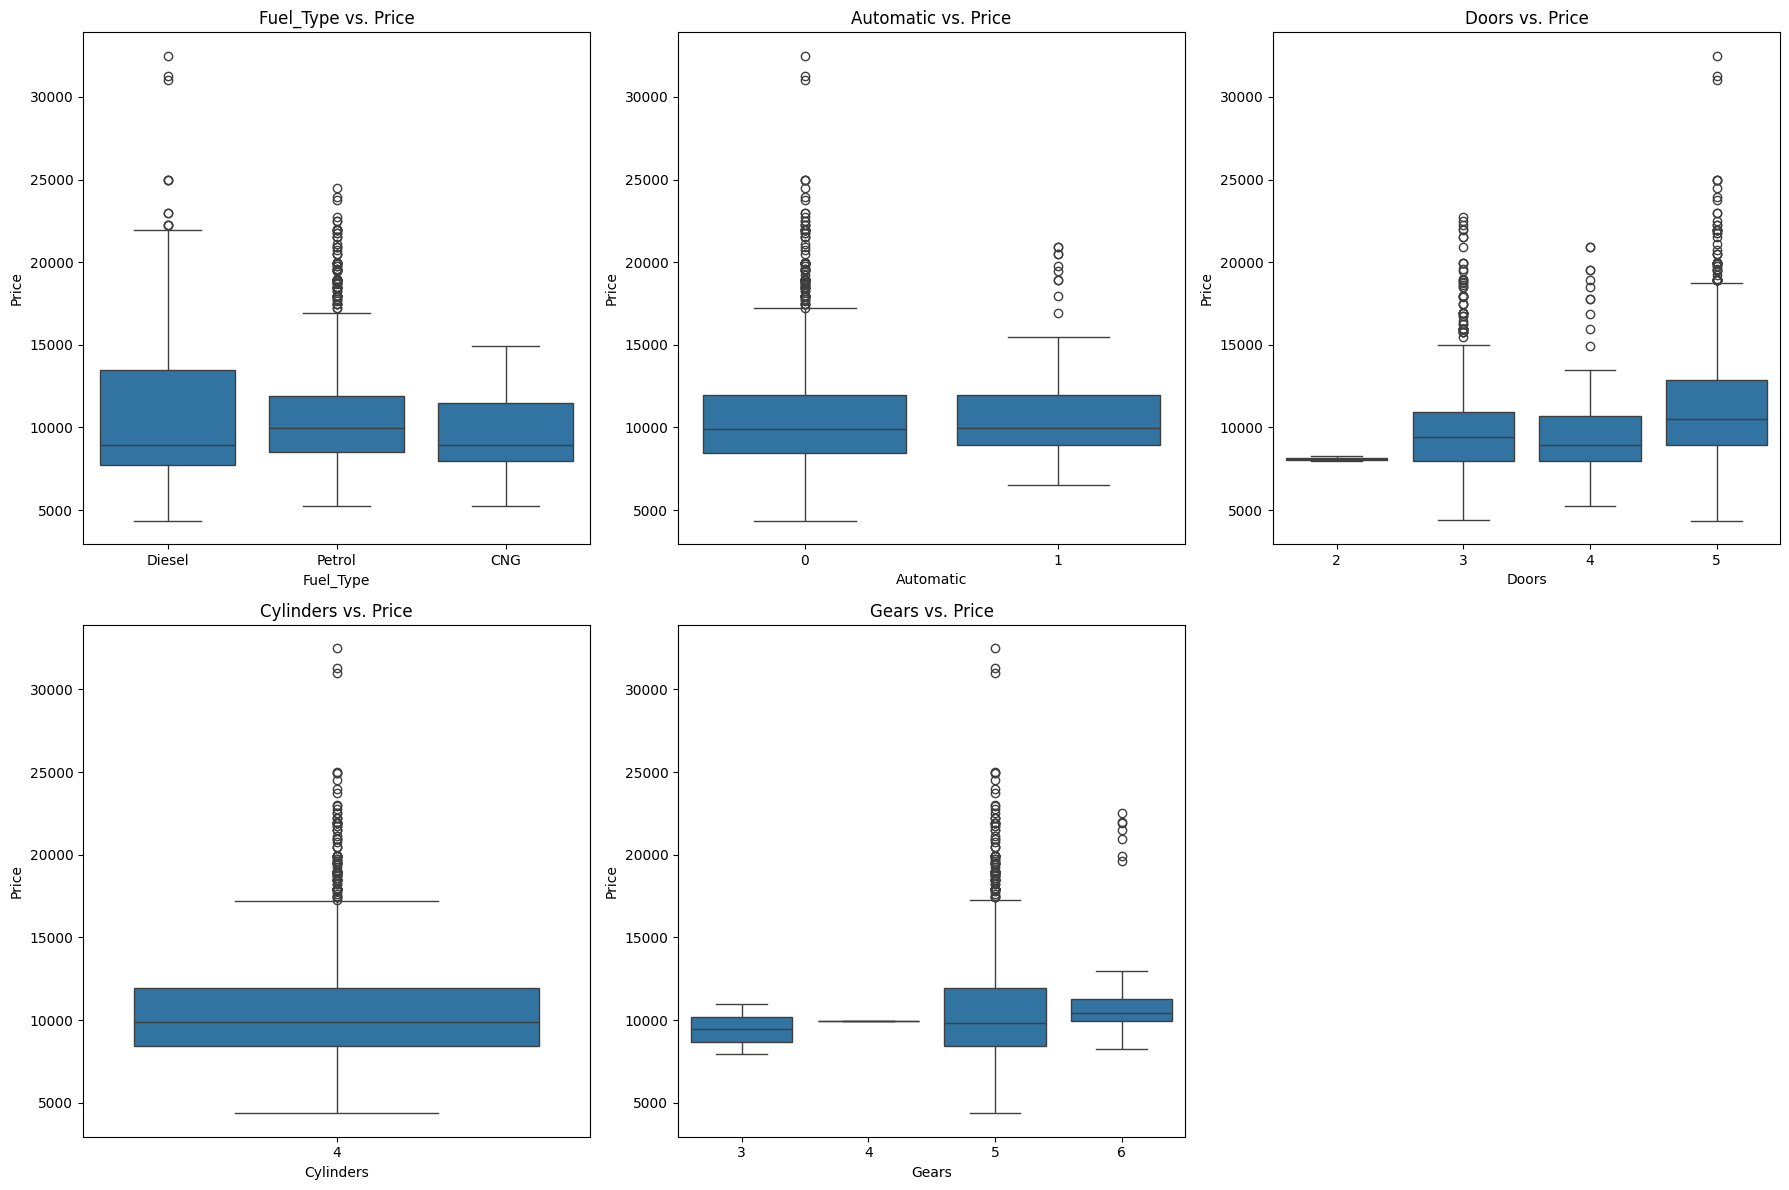

In [10]:
print("Box Plots for Categorical Features vs. Price:")
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Preprocess Data

In [11]:
df_preprocessed = df.drop('Cylinders', axis=1)
print("DataFrame after dropping 'Cylinders' column:")
print(df_preprocessed.head())

DataFrame after dropping 'Cylinders' column:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Gears  \
0  13500         23  46986    Diesel  90          0  2000      3      5   
1  13750         23  72937    Diesel  90          0  2000      3      5   
2  13950         24  41711    Diesel  90          0  2000      3      5   
3  14950         26  48000    Diesel  90          0  2000      3      5   
4  13750         30  38500    Diesel  90          0  2000      3      5   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  


In [12]:
categorical_cols_to_encode = ['Fuel_Type', 'Automatic', 'Doors', 'Gears']
df_encoded = pd.get_dummies(df_preprocessed, columns=categorical_cols_to_encode, drop_first=True)
print("DataFrame after one-hot encoding categorical features:")
print(df_encoded.head())

DataFrame after one-hot encoding categorical features:
   Price  Age_08_04     KM  HP    cc  Weight  Fuel_Type_Diesel  \
0  13500         23  46986  90  2000    1165              True   
1  13750         23  72937  90  2000    1165              True   
2  13950         24  41711  90  2000    1165              True   
3  14950         26  48000  90  2000    1165              True   
4  13750         30  38500  90  2000    1170              True   

   Fuel_Type_Petrol  Automatic_1  Doors_3  Doors_4  Doors_5  Gears_4  Gears_5  \
0             False        False     True    False    False    False     True   
1             False        False     True    False    False    False     True   
2             False        False     True    False    False    False     True   
3             False        False     True    False    False    False     True   
4             False        False     True    False    False    False     True   

   Gears_6  
0    False  
1    False  
2    False  
3    Fals

In [13]:
y = df_encoded['Price']
X = df_encoded.drop('Price', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Shape of X: (1436, 14)
Shape of y: (1436,)
First 5 rows of X:
   Age_08_04     KM  HP    cc  Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0         23  46986  90  2000    1165              True             False   
1         23  72937  90  2000    1165              True             False   
2         24  41711  90  2000    1165              True             False   
3         26  48000  90  2000    1165              True             False   
4         30  38500  90  2000    1170              True             False   

   Automatic_1  Doors_3  Doors_4  Doors_5  Gears_4  Gears_5  Gears_6  
0        False     True    False    False    False     True    False  
1        False     True    False    False    False     True    False  
2        False     True    False    False    False     True    False  
3        False     True    False    False    False     True    False  
4        False     True    False    False    False     True    False  
First 5 rows of y:
0    13500
1    13750
2    139

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print("StandardScaler initialized.")

StandardScaler initialized.


In [15]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled:")
print(X_scaled.head())

Shape of X_scaled: (1436, 14)
First 5 rows of X_scaled:
   Age_08_04        KM        HP        cc    Weight  Fuel_Type_Diesel  \
0  -1.771966 -0.574695 -0.768042  0.997419  1.758561          2.874807   
1  -1.771966  0.117454 -0.768042  0.997419  1.758561          2.874807   
2  -1.718184 -0.715386 -0.768042  0.997419  1.758561          2.874807   
3  -1.610620 -0.547650 -0.768042  0.997419  1.758561          2.874807   
4  -1.395491 -0.801028 -0.768042  0.997419  1.853577          2.874807   

   Fuel_Type_Petrol  Automatic_1   Doors_3   Doors_4   Doors_5   Gears_4  \
0         -2.710874    -0.242893  1.143976 -0.326064 -0.940486 -0.026398   
1         -2.710874    -0.242893  1.143976 -0.326064 -0.940486 -0.026398   
2         -2.710874    -0.242893  1.143976 -0.326064 -0.940486 -0.026398   
3         -2.710874    -0.242893  1.143976 -0.326064 -0.940486 -0.026398   
4         -2.710874    -0.242893  1.143976 -0.326064 -0.940486 -0.026398   

    Gears_5   Gears_6  
0  0.181916 -0.175

## Split Data

### Subtask:
Split the preprocessed dataset into training (80%) and testing (20%) sets to evaluate model performance.


In [16]:
from sklearn.model_selection import train_test_split

print("train_test_split imported successfully.")

train_test_split imported successfully.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (1148, 14)
Shape of X_test: (288, 14)
Shape of y_train: (1148,)
Shape of y_test: (288,)


## Build Multiple Linear Regression Models

In [18]:
from sklearn.linear_model import LinearRegression

print("LinearRegression imported successfully.")

LinearRegression imported successfully.


In [19]:
print("\n--- Model 1: All Features ---")
model1 = LinearRegression()
model1.fit(X_train, y_train)

print(f"Intercept: {model1.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train.columns, model1.coef_):
    print(f"  {feature}: {coef:.2f}")


--- Model 1: All Features ---
Intercept: 10746.85
Coefficients:
  Age_08_04: -2237.79
  KM: -608.40
  HP: 180.91
  cc: -14.02
  Weight: 1424.20
  Fuel_Type_Diesel: -73.63
  Fuel_Type_Petrol: 443.61
  Automatic_1: 19.83
  Doors_3: -264.90
  Doors_4: -67.57
  Doors_5: -336.27
  Gears_4: 74.97
  Gears_5: 386.25
  Gears_6: 461.24


In [20]:
print(
"\n--- Model 2: Selected Numerical Features ---")

# Select features for Model 2 based on high correlation with Price
selected_numerical_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_model2 = X_train[selected_numerical_features]
X_test_model2 = X_test[selected_numerical_features]

model2 = LinearRegression()
model2.fit(X_train_model2, y_train)

print(f"Intercept: {model2.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_model2.columns, model2.coef_):
    print(f"  {feature}: {coef:.2f}")


--- Model 2: Selected Numerical Features ---
Intercept: 10743.73
Coefficients:
  Age_08_04: -2231.69
  KM: -758.59
  HP: 435.08
  Weight: 1040.30


In [21]:
print(
"\n--- Model 3: Selected Numerical and Categorical Features ---")

# Select features for Model 3 (numerical + significant categorical)
selected_features_model3 = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Automatic_1', 'Gears_6']
X_train_model3 = X_train[selected_features_model3]
X_test_model3 = X_test[selected_features_model3]

model3 = LinearRegression()
model3.fit(X_train_model3, y_train)

print(f"Intercept: {model3.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_model3.columns, model3.coef_):
    print(f"  {feature}: {coef:.2f}")


--- Model 3: Selected Numerical and Categorical Features ---
Intercept: 10746.05
Coefficients:
  Age_08_04: -2251.62
  KM: -610.49
  HP: 217.86
  Weight: 1323.26
  Fuel_Type_Diesel: 13.78
  Fuel_Type_Petrol: 459.33
  Automatic_1: 28.51
  Gears_6: 92.58


### Coefficient

## Evaluate Models

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluation metrics and plotting libraries imported successfully.")

Evaluation metrics and plotting libraries imported successfully.


In [23]:
def evaluate_model(model, X_test_data, y_test_data, model_name):
    y_pred = model.predict(X_test_data)

    # Calculate metrics
    r2 = r2_score(y_test_data, y_pred)
    mae = mean_absolute_error(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Plot predicted vs. actual values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_data, y=y_pred, alpha=0.6)
    plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], color='red', linestyle='--')
    plt.title(f'{model_name}: Actual vs. Predicted Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)
    plt.show()

print("evaluate_model function defined.")

evaluate_model function defined.



--- Model 1: All Features Evaluation ---
R-squared: 0.8326
Mean Absolute Error (MAE): 978.03
Mean Squared Error (MSE): 2233775.79
Root Mean Squared Error (RMSE): 1494.58


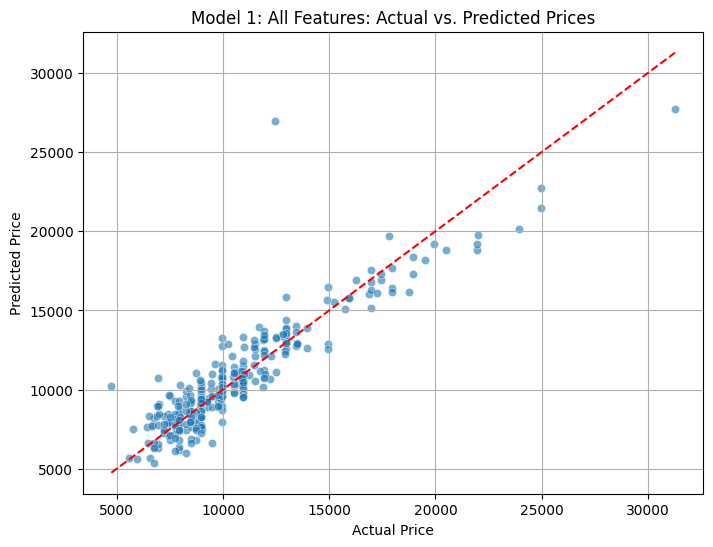

In [24]:
evaluate_model(model1, X_test, y_test, "Model 1: All Features")


--- Model 2: Selected Numerical Features Evaluation ---
R-squared: 0.8506
Mean Absolute Error (MAE): 1001.20
Mean Squared Error (MSE): 1993321.01
Root Mean Squared Error (RMSE): 1411.85


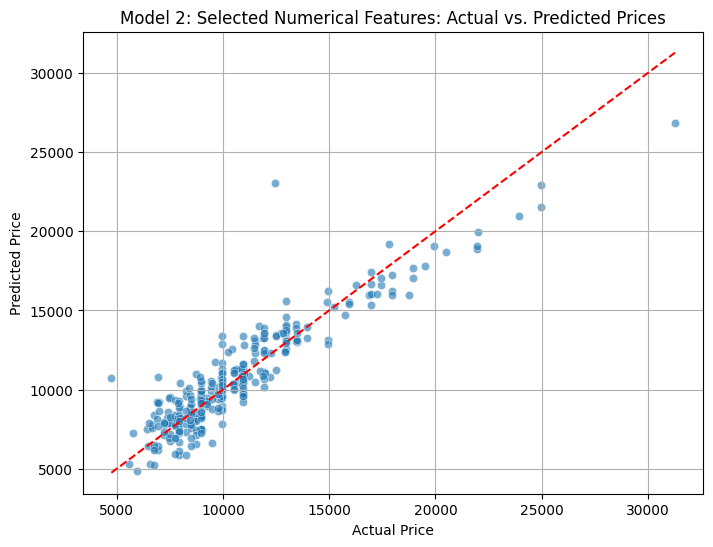

In [25]:
evaluate_model(model2, X_test_model2, y_test, "Model 2: Selected Numerical Features")


--- Model 3: Selected Numerical and Categorical Features Evaluation ---
R-squared: 0.8358
Mean Absolute Error (MAE): 997.32
Mean Squared Error (MSE): 2190622.48
Root Mean Squared Error (RMSE): 1480.08


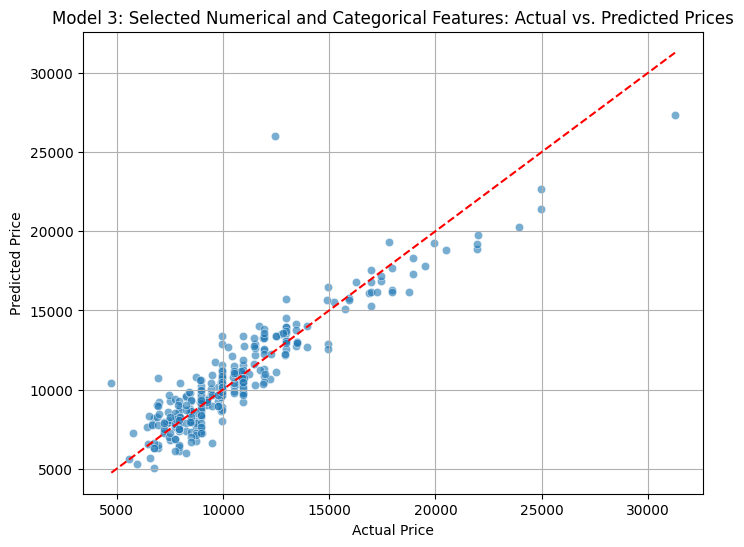

In [26]:
evaluate_model(model3, X_test_model3, y_test, "Model 3: Selected Numerical and Categorical Features")

## Apply Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

print("Lasso imported successfully.")

Lasso imported successfully.


In [28]:
print("\n--- Lasso Regression Model (alpha=0.1) ---")
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

print("Lasso model trained successfully.")


--- Lasso Regression Model (alpha=0.1) ---
Lasso model trained successfully.



--- Lasso Regression Model (alpha=0.1) Evaluation ---
R-squared: 0.8326
Mean Absolute Error (MAE): 978.05
Mean Squared Error (MSE): 2233403.50
Root Mean Squared Error (RMSE): 1494.46


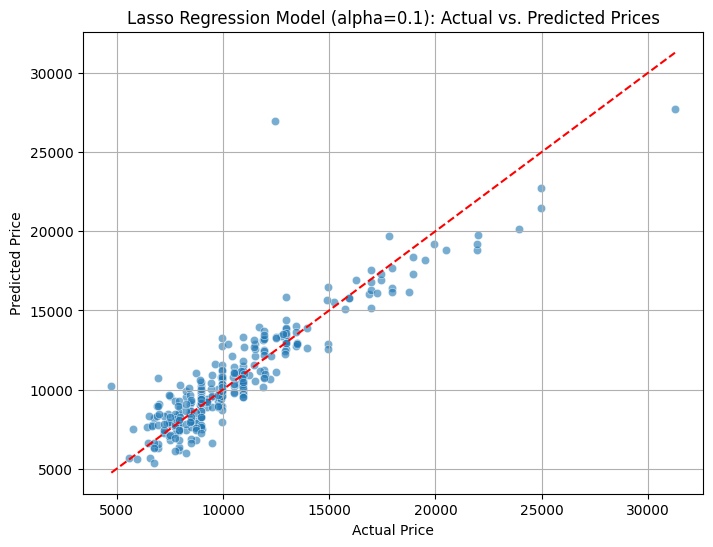

In [29]:
evaluate_model(lasso_model, X_test, y_test, "Lasso Regression Model (alpha=0.1)")

In [30]:
print(f"Intercept: {lasso_model.intercept_:.2f}")

Intercept: 10746.87


In [31]:
print("Coefficients (Lasso Regression):")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.2f}")

Coefficients (Lasso Regression):
  Age_08_04: -2237.78
  KM: -608.34
  HP: 180.92
  cc: -13.89
  Weight: 1423.69
  Fuel_Type_Diesel: -72.84
  Fuel_Type_Petrol: 443.94
  Automatic_1: 19.61
  Doors_3: -227.13
  Doors_4: -45.14
  Doors_5: -298.15
  Gears_4: 74.30
  Gears_5: 382.15
  Gears_6: 457.21


## Apply Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

print("Ridge imported successfully.")

Ridge imported successfully.


In [33]:
print("\n--- Ridge Regression Model (alpha=1.0) ---")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

print("Ridge model trained successfully.")


--- Ridge Regression Model (alpha=1.0) ---
Ridge model trained successfully.



--- Ridge Regression Model (alpha=1.0) Evaluation ---
R-squared: 0.8328
Mean Absolute Error (MAE): 978.12
Mean Squared Error (MSE): 2230705.35
Root Mean Squared Error (RMSE): 1493.55


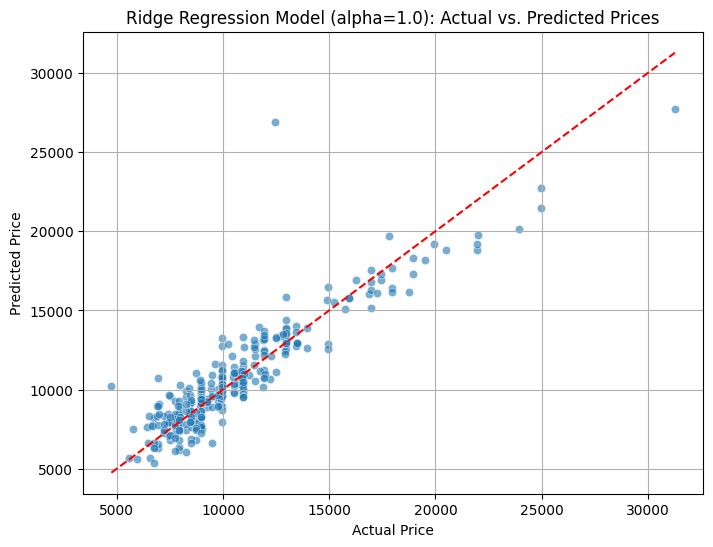

In [34]:
evaluate_model(ridge_model, X_test, y_test, "Ridge Regression Model (alpha=1.0)")

In [35]:
print(f"Intercept: {ridge_model.intercept_:.2f}")

Intercept: 10746.87


In [36]:
print("Coefficients (Ridge Regression):")
for feature, coef in zip(X_train.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.2f}")

Coefficients (Ridge Regression):
  Age_08_04: -2235.90
  KM: -609.77
  HP: 182.61
  cc: -13.84
  Weight: 1420.50
  Fuel_Type_Diesel: -71.82
  Fuel_Type_Petrol: 441.31
  Automatic_1: 19.71
  Doors_3: -202.86
  Doors_4: -31.26
  Doors_5: -272.86
  Gears_4: 72.98
  Gears_5: 373.62
  Gears_6: 448.67
